# **Credit Card Fraud Prediction**
### **Predicting Fraudulent Credit Card Transactions using Logistic regression Algorithm**
## **Mercy Consolate Akello**
## **2024-01-12**

## **Introduction**

**In today's digital age, credit card fraud has become a significant concern for both financial institutions and consumers. Detecting fraudulent transactions accurately and efficiently is crucial to protect individuals and businesses from financial losses. Machine learning models have emerged as powerful tools in identifying fraudulent credit card transactions, leveraging the vast amount of transaction data available.**

**The objective of this task is to build a robust machine learning model that can effectively classify credit card transactions as either fraudulent or genuine. To achieve this, several steps will be undertaken. First, the transaction data will be preprocessed and normalized to ensure consistency and remove any inconsistencies or outliers that may affect the model's performance.**

**One challenge in building such a model is the class imbalance issue, where the number of fraudulent transactions is significantly lower than genuine ones. To address this, techniques like oversampling or undersampling can be employed to balance the classes and improve the model's ability to detect fraudulent transactions accurately.**

**The dataset will then be split into training and testing sets, allowing us to train the model on a portion of the data and evaluate its performance on unseen data. Various classification algorithms, such as logistic regression or random forests, can be considered for training the model. These algorithms have proven to be effective in handling binary classification tasks and can provide valuable insights into the likelihood of a transaction being fraudulent.**

**Finally, the model's performance will be evaluated using appropriate metrics such as Area Under Curve (AUC). These metrics will help assess the model's ability to correctly classify fraudulent and genuine transactions and provide insights into its overall effectiveness.**

**By building a machine learning model to identify fraudulent credit card transactions, we aim to enhance fraud detection capabilities, minimize financial losses, and ensure the security of individuals and businesses. This task showcases the power of machine learning in addressing real-world challenges and highlights the importance of continuous improvement and evaluation to achieve optimal results.**

## **Load data**

In [1]:
library(readr)
creditcard <- read_csv("/content/creditcard.csv")

Rows: 9964 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (31): Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### **Check for missing data**

In [2]:
colSums(is.na(creditcard))

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9    V10 
     0      0      0      0      0      0      0      0      0      0      0 
   V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21 
     0      0      0      0      0      0      0      0      0      0      0 
   V22    V23    V24    V25    V26    V27    V28 Amount  Class 
     0      0      0      0      0      0      0      0      0

**No missing values were found in the data**

## **Convert data type**

In [3]:
creditcard$Class=as.factor(creditcard$Class)

## **Perform Exploratory Data Analysis**

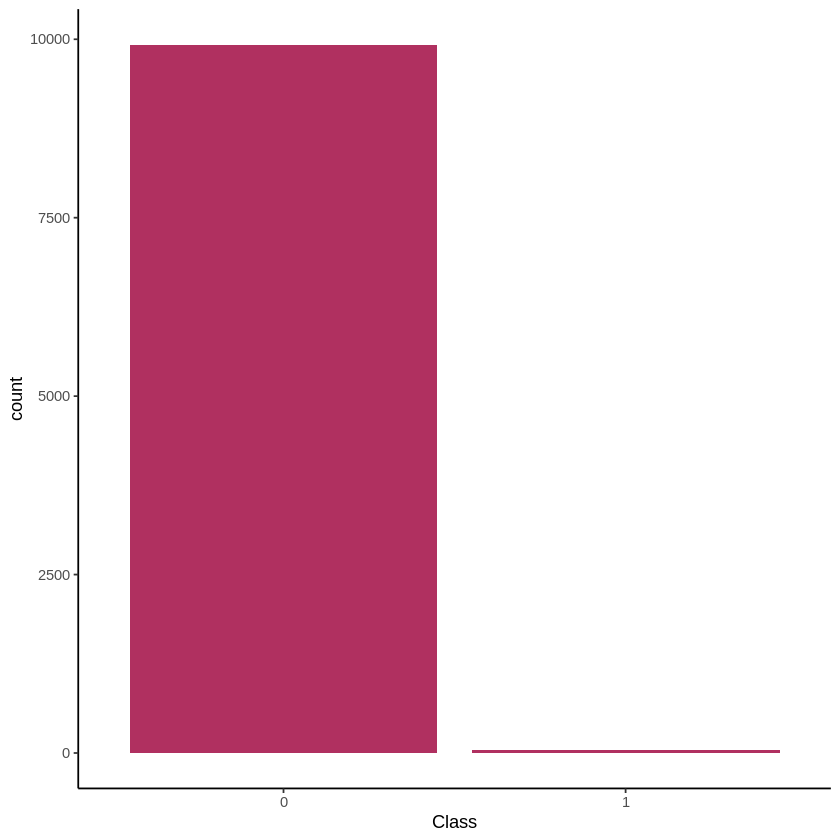

In [4]:
library(ggplot2)
ggplot(creditcard,aes(Class))+
  geom_bar(fill='maroon')+
  theme_classic()

**1 means Fraudlent Transaction**

**0 means Non Fraudlent Transaction**

**There exists an imbalance in the distribution of the Class variable**

**The category 1 has less than 75% of the category 0.**

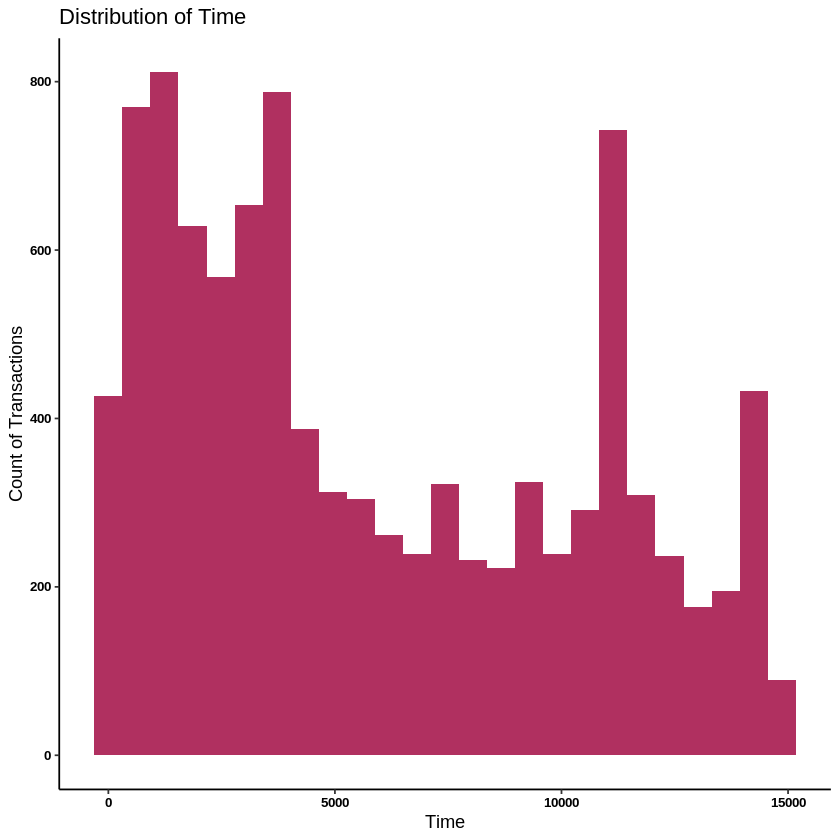

In [5]:
ggplot(creditcard,aes(Time))+
  geom_histogram(bins=25,fill='maroon')+
  theme_classic()+
  theme(axis.text.x=element_text(size=8,face = 'bold',color='black'),
        axis.text.y=element_text(size=8,face='bold',color='black'))+
  labs(title = 'Distribution of Time',y='Count of Transactions')

**There is a bimodal distribution in the time.**

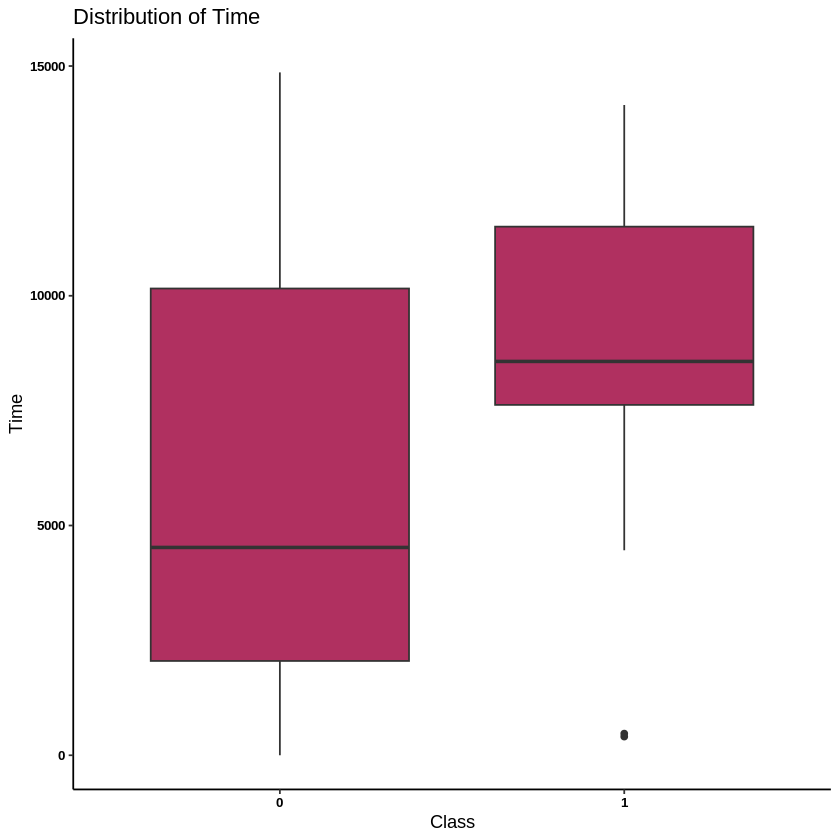

In [6]:
ggplot(creditcard,aes(Class,Time))+
  geom_boxplot(fill='maroon')+
  theme_classic()+
  theme(axis.text.x=element_text(size=8,face = 'bold',color='black'),
        axis.text.y=element_text(size=8,face='bold',color='black'))+
  labs(title = 'Distribution of Time')

## **Split dataset into two**

In [ ]:
# Only install this if it's not yet installed.
#install.packages("caTools")

In [8]:
library(caTools)
set.seed(02468)
sample=sample.split(creditcard$Class,SplitRatio=.80)
train=subset(creditcard, sample==TRUE)
test=subset(creditcard, sample==FALSE)

## **Handle class imbalance**
### **Upsample the Train set**

**Due to the imbalance in the "Class" variable, I went ahead to apply upsampling technique to the train dataset before building the predictive model**

In [ ]:
# Only install this if it's not yet installed.
#install.packages("caret")

In [10]:
library(caret)
train=upSample(train,train$Class)
train=subset(train,select=-Class)

Loading required package: lattice



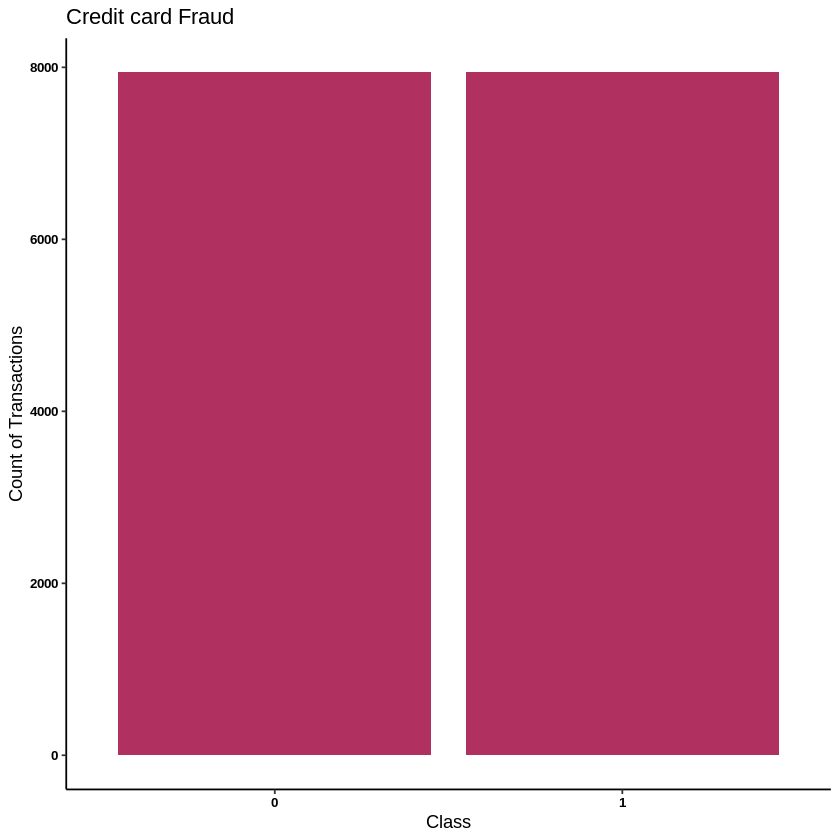

In [11]:
ggplot(train,aes(Class))+
  geom_bar(fill='maroon')+
  theme_classic()+
  theme(axis.text.x=element_text(size=8,face = 'bold',color='black'),
        axis.text.y=element_text(size=8,face='bold',color='black'))+
  labs(title = 'Credit card Fraud',y='Count of Transactions')

## **Model Building**
### **Build a logistic regression model**

In [12]:
lr.model=glm(Class~., train, family='binomial')

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


## **Predict using test data**

In [13]:
lr.mod.test=predict(lr.model, test, type='response')

## **Model performance**
### **Check for model performance using test data**

In [ ]:
# Only install this if it's not yet installed.
# install.packages("pROC")

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = train$Class, predictor = as.vector(fitted.values(lr.model)))

Data: as.vector(fitted.values(lr.model)) in 7941 controls (train$Class 0) < 7941 cases (train$Class 1).
Area under the curve: 1


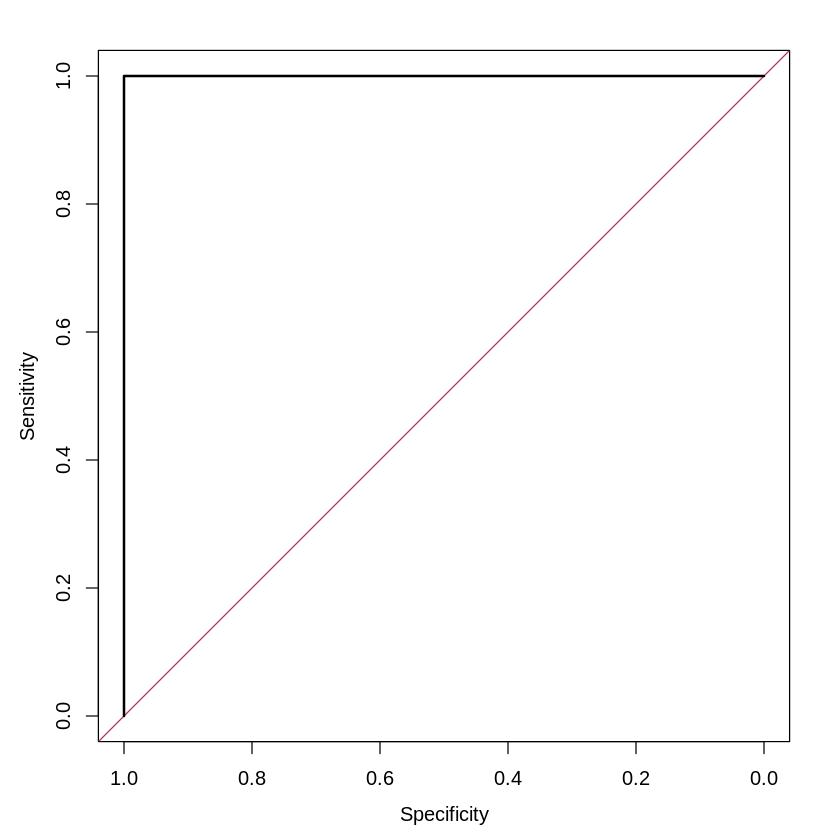

In [15]:
library(pROC)
tree.roc <- roc(train$Class,
                as.vector(fitted.values(lr.model)))
plot(tree.roc,identity.col='maroon')
print(tree.roc)

## **Conclusion**

**In conclusion, the model used in this task demonstrated exceptional performance in predicting credit fraud for the bank, as evidenced by the high Area Under the Curve (AUC) value of 1.0.A value close to 1 indicates that the model has a high level of accuracy and reliability in distinguishing between fraudulent and non-fraudulent transactions.**

**This outcome is highly promising and suggests that the model can effectively assist the bank in identifying potential instances of credit fraud. By leveraging advanced machine learning techniques, such as the one employed in this task, financial institutions can enhance their fraud detection capabilities and mitigate potential risks. The impressive AUC value underscores the model's ability to make accurate predictions, providing valuable insights for proactive fraud prevention and safeguarding the bank's financial interests.**